### **Name: Syed Umair Andrabi**
### **Reg.No: 22MCB0015**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# **Understanding and Getting Data Ready**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA SETS/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# **Cleaning Dataset**

### **1. Checking for missing values**

In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values

### **2. Checking for duplicate rows**

If the duplicates are skewed towards a certain class, it could bias model.

In [ ]:
duplicates = data[data.duplicated()]
print(f"Duplicates count: {len(duplicates)}")

Duplicates count: 33


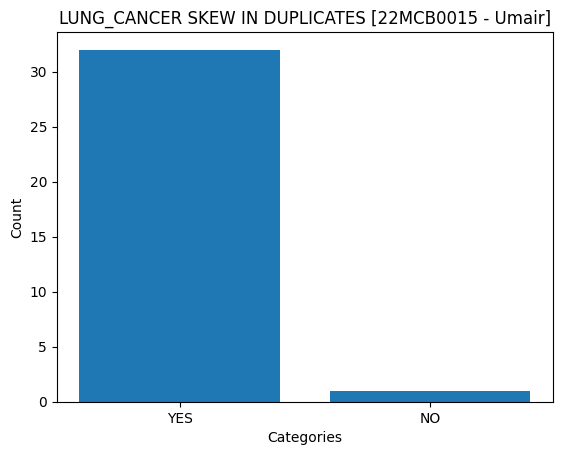

In [ ]:
# Plotting the bar plot to check skew
category_counts = duplicates['LUNG_CANCER'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('LUNG_CANCER SKEW IN DUPLICATES [22MCB0015 - Umair]')
plt.show()

In [ ]:
# Need to remove duplicates otherwise will cause bias in our model
data.drop_duplicates(inplace=True)

### **3. Identifying the irregular cardinality**

In [ ]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

GENDER: 2
AGE: 39
SMOKING: 2
YELLOW_FINGERS: 2
ANXIETY: 2
PEER_PRESSURE: 2
CHRONIC DISEASE: 2
FATIGUE : 2
ALLERGY : 2
WHEEZING: 2
ALCOHOL CONSUMING: 2
COUGHING: 2
SHORTNESS OF BREATH: 2
SWALLOWING DIFFICULTY: 2
CHEST PAIN: 2
LUNG_CANCER: 2


Based on above values, there are no irregular cardinalities.

### **3. Handling Outliers**

All features are binary except age.
Let us plot box-plot for age.

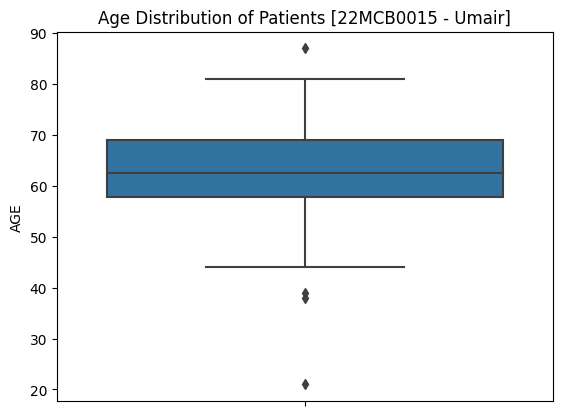

In [ ]:
sns.boxplot(y='AGE', data=data)
plt.title("Age Distribution of Patients [22MCB0015 - Umair]")
plt.show()

Outliers in age, they are within reasonable bounds (e.g., 1-100 years old for a human), aren't typically erroneous and shouldn't  be removed

### **4. Normalization and Standardization**

In your case, most of the features are binary (1 or 2, corresponding to 'No' or 'Yes') and the 'AGE' feature is numerical. Tree-based algorithms (like decision trees and random forest) are not sensitive to the scale of the input features, and can often perform well without feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the data
data_standardized = data.copy()
data_standardized['AGE'] = scaler.fit_transform(data_standardized[['AGE']])

data_standardized['AGE'].head()


0    0.728176
1    1.325964
2   -0.467401
3    0.010830
4    0.010830
Name: AGE, dtype: float64

But we will not be using the standardized age.

### **Label Encoding**

We encode "MALE", "FEMALE" and "YES" and "NO"

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = data.copy()
data_encoded['GENDER'] = le.fit_transform(data_encoded['GENDER'])
data_encoded['LUNG_CANCER'] = le.fit_transform(data_encoded['LUNG_CANCER'])

# 1 - Male; 0 - Female
# 1 - Yes;  0 - No

Other categorical values are already in numerical form, but for visualization purpose we need to YES and NO. So below code is doing that.

In [ ]:
# Converting 2, 1 with yes and no
data_yes_no = data.copy()

# Next, replace 1 and 2 with 'No' and 'Yes' in each relevant column
yes_no_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in yes_no_cols:
    data_yes_no[col] = data_yes_no[col].replace({1: 'No', 2: 'Yes'})

# **Visualization**

1. Visualize each feature's distribution of binary values

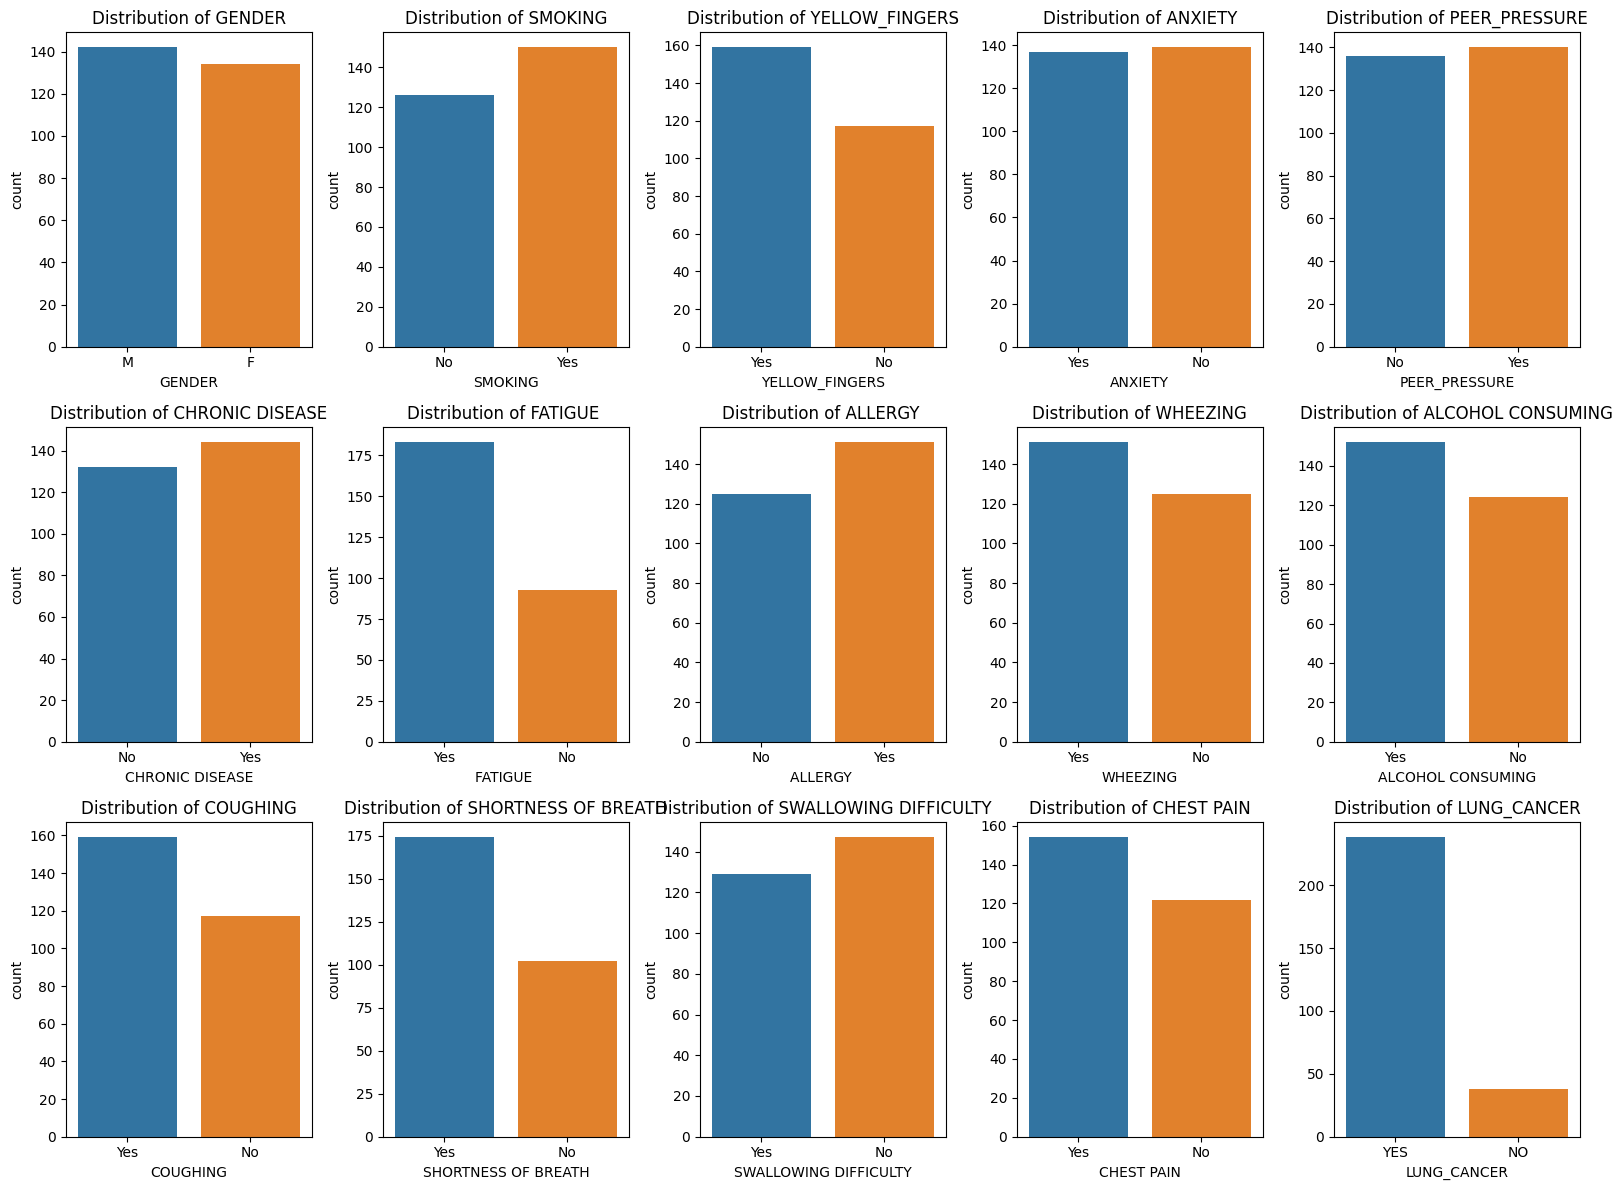

In [ ]:
columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

n_row = 3
n_col = 5
n_sub = 1

plt.figure(figsize=(16, 12))

for column in columns:
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x=column, data=data_yes_no)
    plt.title(f"Distribution of {column}")
    n_sub += 1

plt.tight_layout()
plt.show()


**2. Correlation between features (Not usefull for categorical(binary) values)**

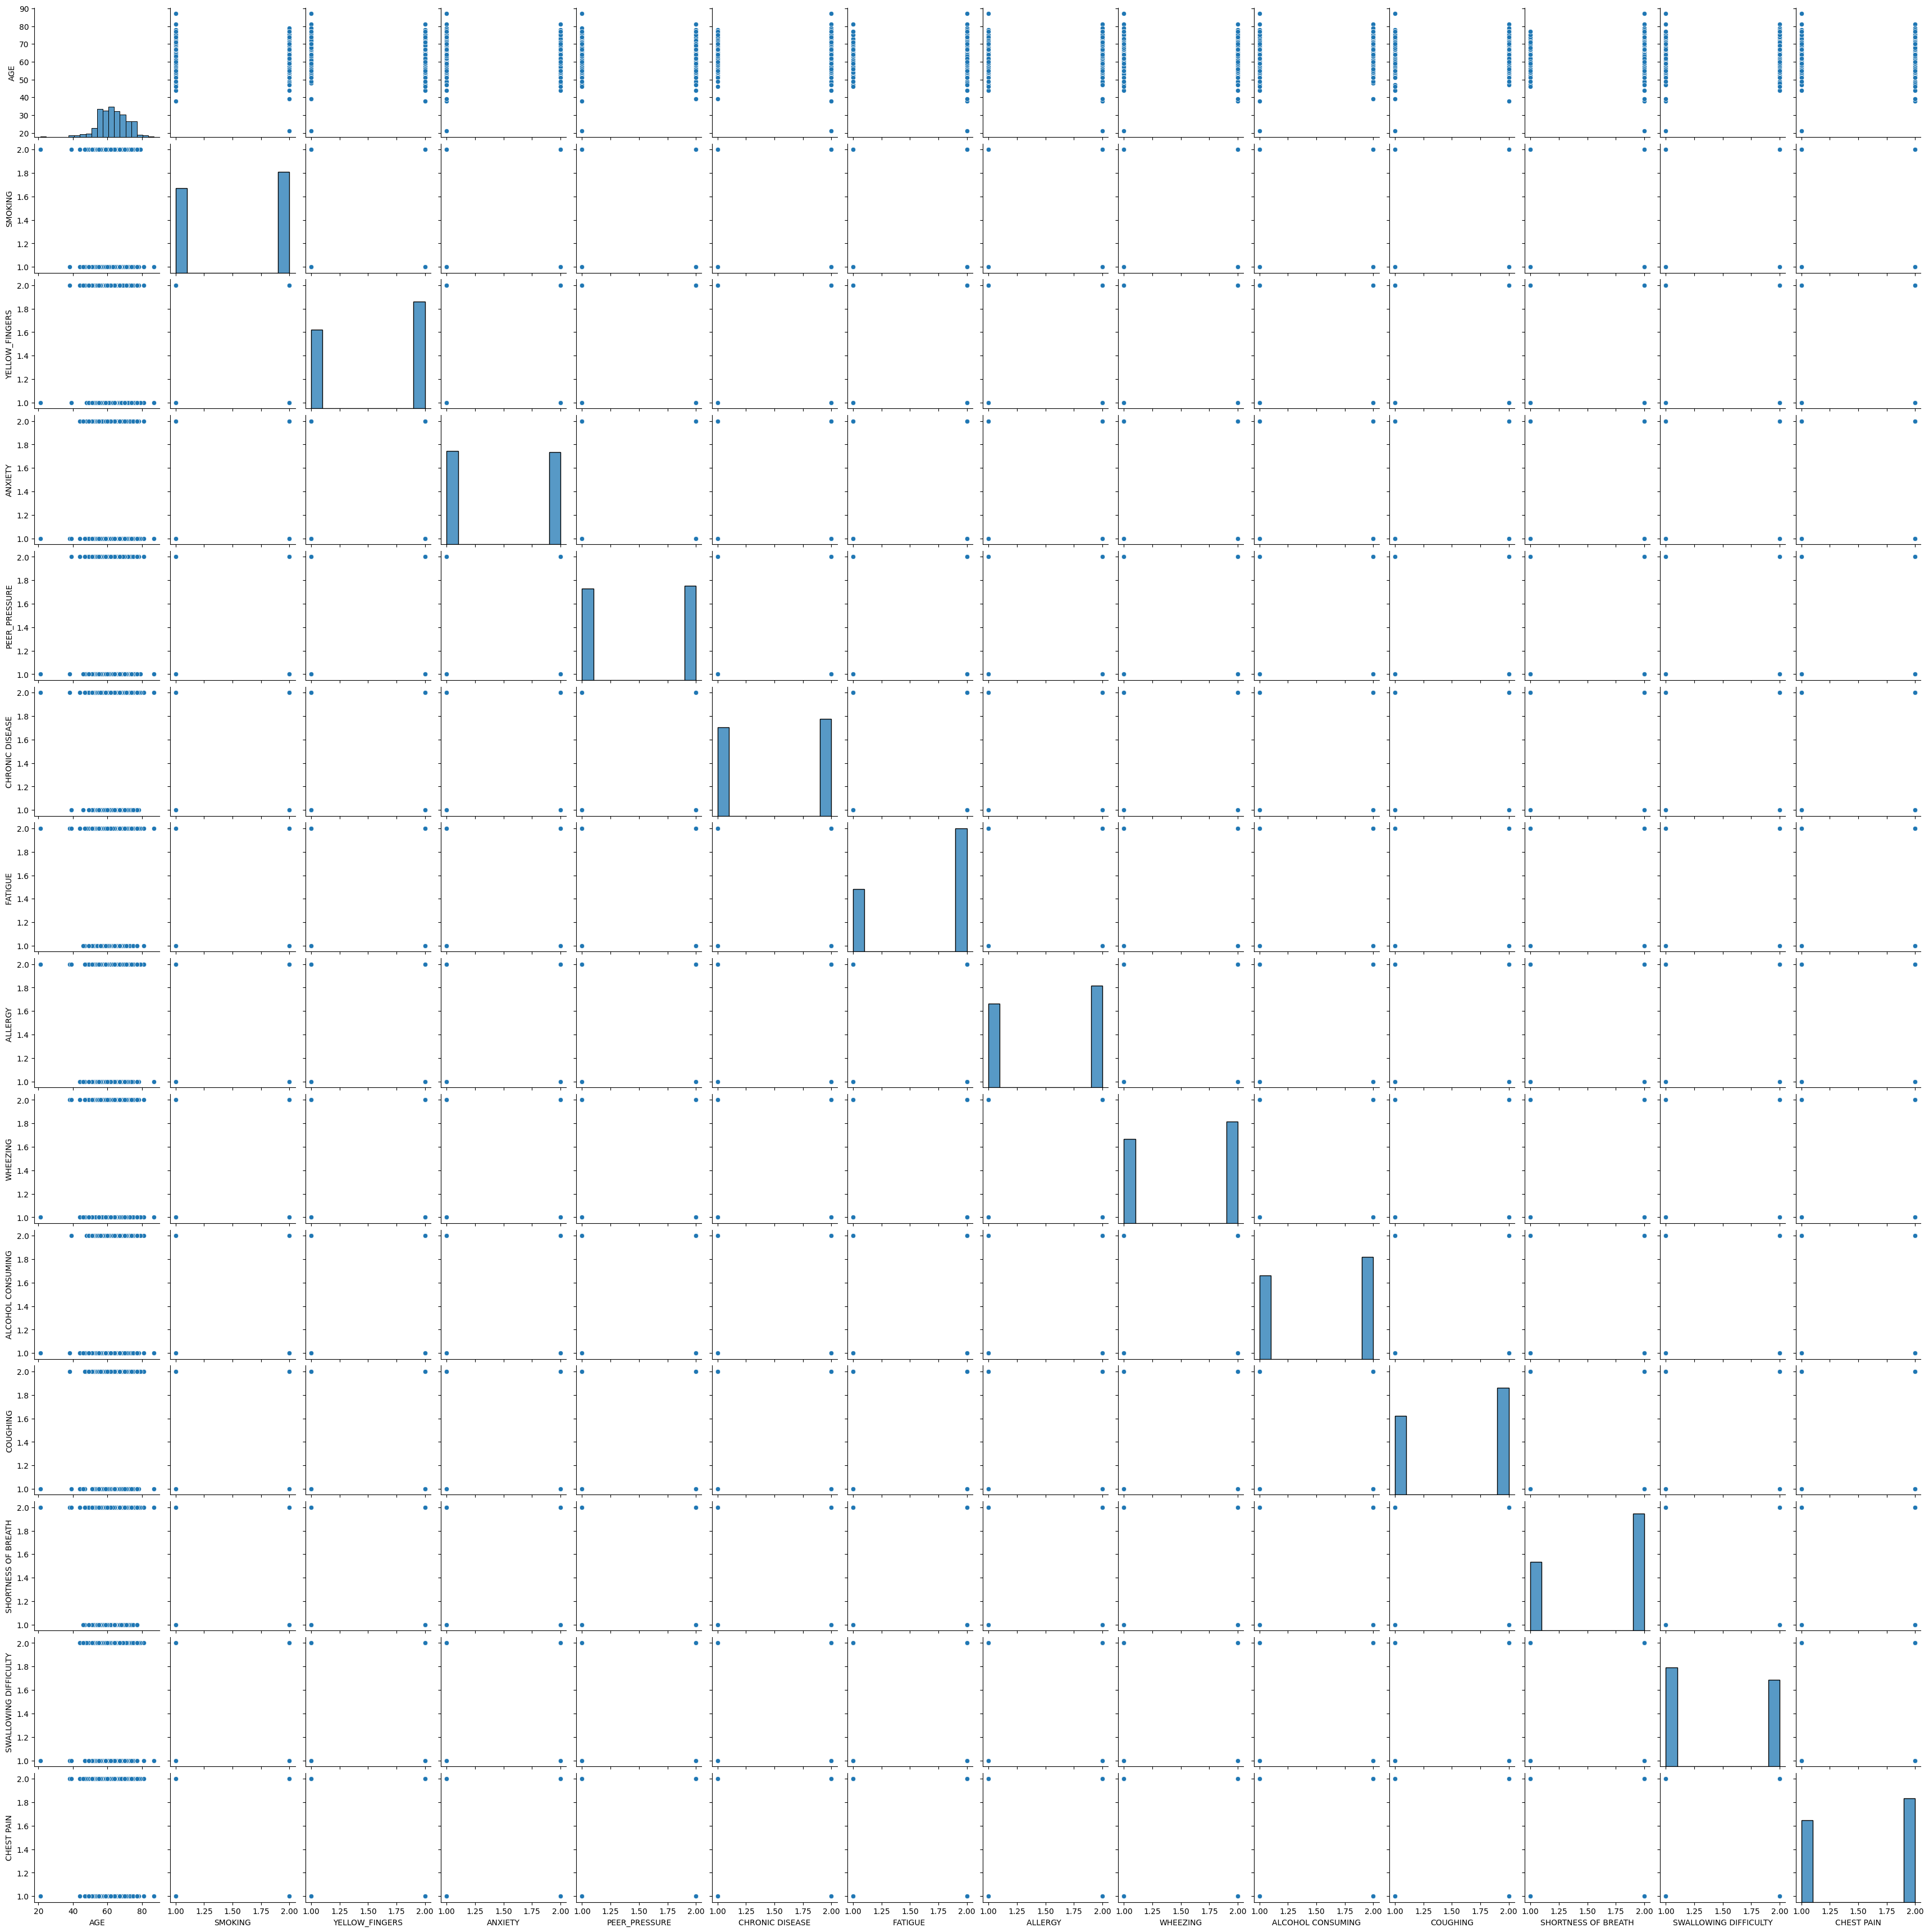

In [ ]:
sns.pairplot(data)
plt.show()

**3. Barplot for the categorical data gender vs cancer.**

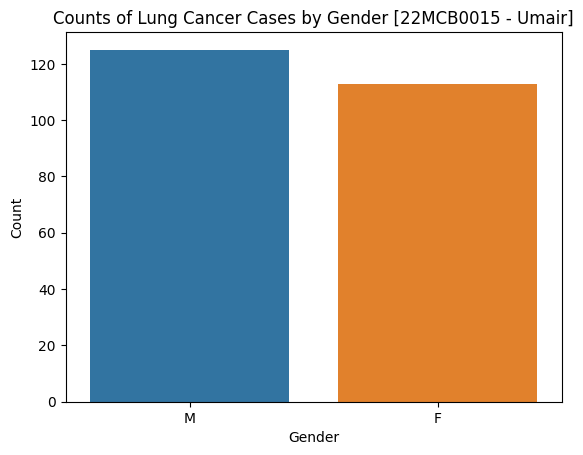

In [ ]:
# Filter your DataFrame to include only those who have lung cancer
data_cancer = data[data['LUNG_CANCER'] == "YES"]

# Count the values for each gender
gender_counts = data_cancer['GENDER'].value_counts()

# Create the barplot
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Counts of Lung Cancer Cases by Gender [22MCB0015 - Umair]")
plt.show()
# this plot shows more men have cases of lung cancer

 **4. Box plot for distribution of ages who have lung cancer**

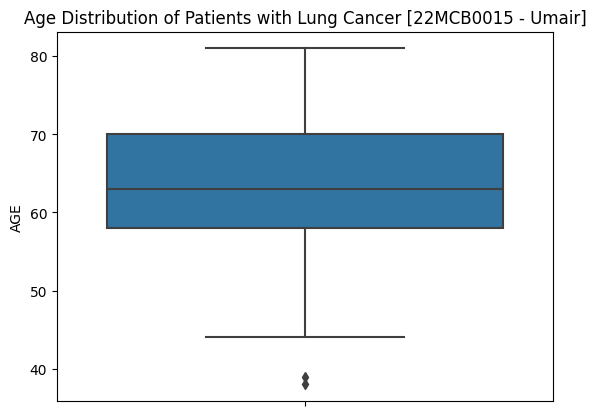

In [ ]:
# Filter your DataFrame to include only those who have lung cancer
data_cancer = data_encoded[data_encoded['LUNG_CANCER'] == 1]

# Create the boxplot
sns.boxplot(y='AGE', data=data_cancer)
plt.title("Age Distribution of Patients with Lung Cancer [22MCB0015 - Umair]")
plt.show()
# This plot shows median for age who have cancer is just above 60.

**5. Histogram of ages of people who have lung cancer**

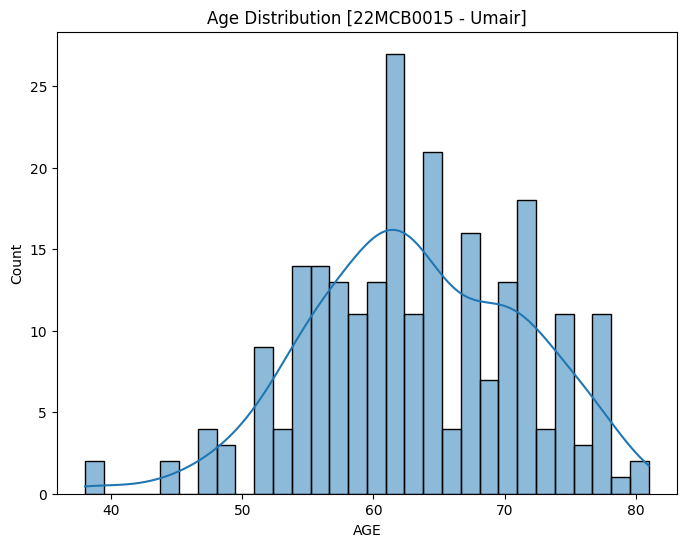

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data_cancer, x='AGE', bins=30, kde=True)
plt.title("Age Distribution [22MCB0015 - Umair]")
plt.show()


**6. Correlation Heatmap**

Heatmap to see the correlation between the different variables in your dataset. This can be especially useful in understanding which features might be predictive of whether someone has lung cancer:

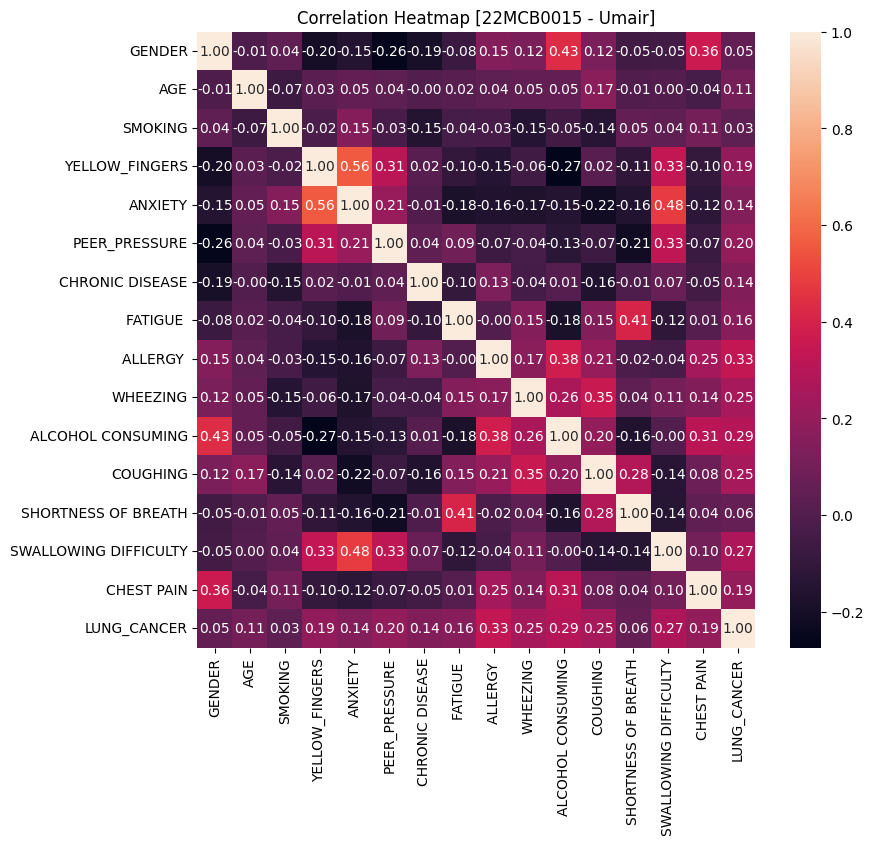

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap [22MCB0015 - Umair]")
plt.show()

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features from the target
X = data_encoded.drop('LUNG_CANCER', axis=1)
y = data_encoded['LUNG_CANCER']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Feature Selection**

Since the dataset does not  to have a very high number of features, PCA may not be necessary. Instead, feature selection might be a good idea

Since this dataset has categorical features, CHI-SQUARE is the appropriate method.

**1. Chi-Square**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply the feature selection on the training data
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, y_train)

# Create DataFrame to visualize the scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns

# Print the best features
print(featureScores.nlargest(10,'Score'))

                  Feature     Score
8                ALLERGY   3.788807
10      ALCOHOL CONSUMING  2.656334
11               COUGHING  1.773811
9                WHEEZING  1.588912
13  SWALLOWING DIFFICULTY  1.438232
5           PEER_PRESSURE  1.424795
6         CHRONIC DISEASE  1.203645
14             CHEST PAIN  0.891882
1                     AGE  0.820777
7                FATIGUE   0.723868


In [ ]:
# Reduce X_train and X_test to the selected features
X_train_chi_square = fit.transform(X_train)
X_test_chi_square = fit.transform(X_test)
selected_features_chi = X_train.columns[bestfeatures.get_support()]
print("Selected Features:", selected_features_chi.values)

Selected Features: ['AGE' 'PEER_PRESSURE' 'CHRONIC DISEASE' 'FATIGUE ' 'ALLERGY ' 'WHEEZING'
 'ALCOHOL CONSUMING' 'COUGHING' 'SWALLOWING DIFFICULTY' 'CHEST PAIN']


## **Feature Elimination**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE to the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Transform the test set
X_test_rfe = rfe.transform(X_test)

selected_features_RFE = X.columns[rfe.get_support()]
print("Selected Features:", selected_features_RFE.values)


Selected Features: ['GENDER' 'AGE' 'SMOKING' 'YELLOW_FINGERS' 'CHRONIC DISEASE' 'FATIGUE '
 'ALLERGY ' 'ALCOHOL CONSUMING' 'COUGHING' 'CHEST PAIN']


# **Root node Selection**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=10)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

features = {}
for feature, importance in zip(X.columns, feature_importances):
    features[feature]=importance
    print(f"{feature}: {importance}")

# Sort the dictionary by importance in descending order
features = dict(sorted(features.items(), key=lambda x: -x[1]))


GENDER: 0.03961802802008989
AGE: 0.2521809901517156
SMOKING: 0.003165690312347983
YELLOW_FINGERS: 0.11091769253353127
ANXIETY: 0.011423284619160923
PEER_PRESSURE: 0.06724160719006081
CHRONIC DISEASE: 0.09143275439865445
FATIGUE : 0.07184620540997783
ALLERGY : 0.10948838394174293
WHEEZING: 0.0
ALCOHOL CONSUMING: 0.0821782854787404
COUGHING: 0.08395848335414637
SHORTNESS OF BREATH: 0.054520222045995256
SWALLOWING DIFFICULTY: 0.0
CHEST PAIN: 0.022028372543836473


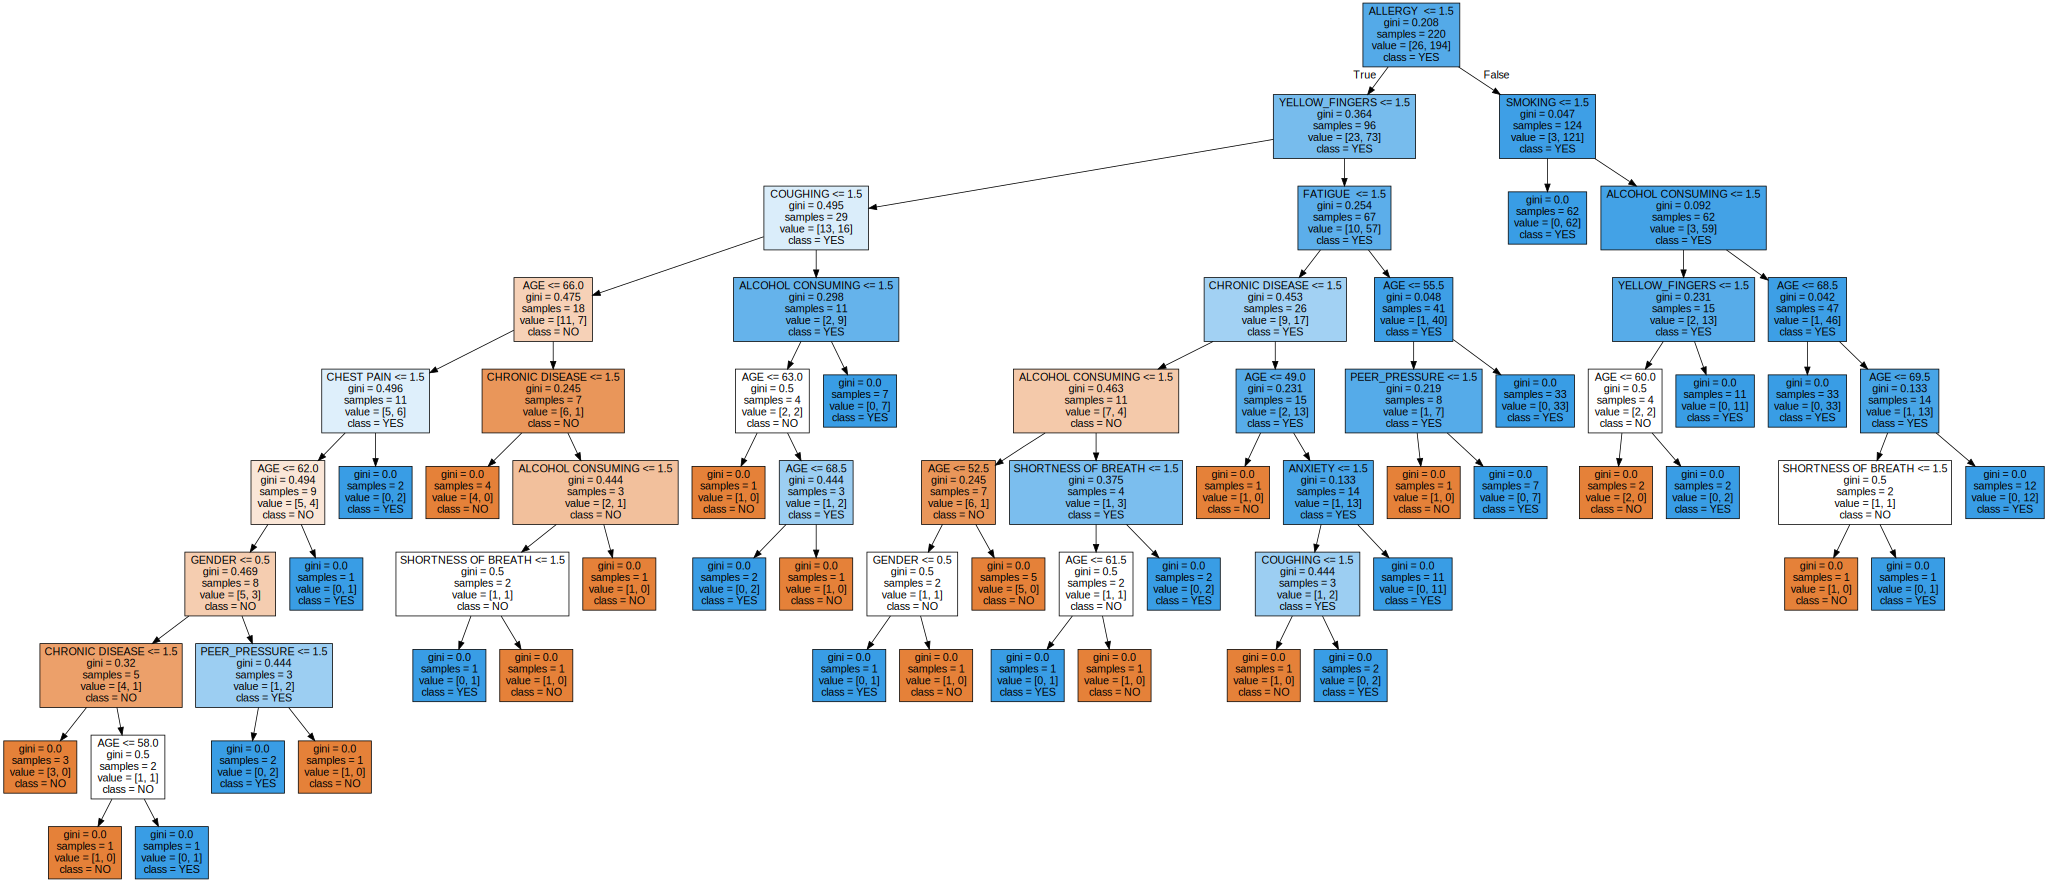

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['NO', 'YES'], filled=True)

# Use graphviz to create a graph from the dot file
graph = graphviz.Source(dot_data)

# Display the graph
graph


# **Model Building**

1. Using all features

In [ ]:
# Using all features
from sklearn.tree import DecisionTreeClassifier

model_all = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_all.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

2. Using features selected by CHI-SQUARE

In [ ]:
# Using features selected by CHI-SQUARE
model_chi = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_chi.fit(X_train_chi_square, y_train)

DecisionTreeClassifier(random_state=42)

3. Using features selected by RFE

In [ ]:
# Using features selected by RFE
model_rfe = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_rfe.fit(X_train_rfe, y_train)

DecisionTreeClassifier(random_state=42)

### **Prediction**

In [ ]:
y_pred_all = model_all.predict(X_test)
y_pred_chi = model_chi.predict(X_test_chi_square)
y_pred_rfe = model_rfe.predict(X_test_rfe)

In [ ]:
# Getting the accuracy of each model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score

y_true= y_test.values.tolist()
accuracy_all = accuracy_score(y_true, y_pred_all)
accuracy_chi = accuracy_score(y_true, y_pred_chi)
accuracy_rfe = accuracy_score(y_true, y_pred_rfe)

from tabulate import tabulate

scores_table = [
    ['All Features', accuracy_all*100],
    ['CHI-SQUARE', accuracy_chi*100],
    ['RFE feature', accuracy_rfe*100]
]

headers = ['Feature Selection Technique', 'Accuracy Score']

print(tabulate(scores_table, headers=headers, tablefmt='grid'))

+-------------------------------+------------------+
| Feature Selection Technique   |   Accuracy Score |
+===============================+==================+
| All Features                  |          91.0714 |
+-------------------------------+------------------+
| CHI-SQUARE                    |          80.3571 |
+-------------------------------+------------------+
| RFE feature                   |          89.2857 |
+-------------------------------+------------------+


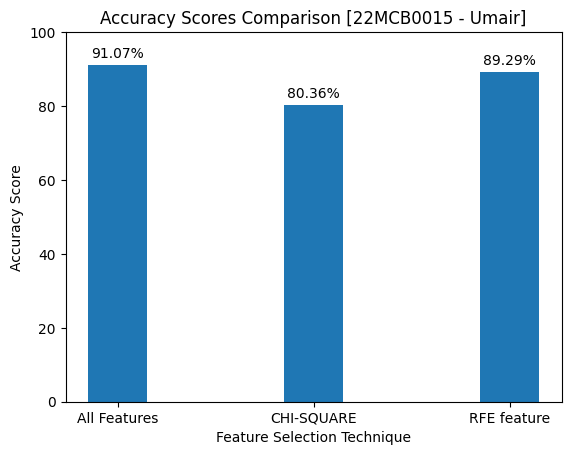

In [ ]:
labels = ['All Features', 'CHI-SQUARE', 'RFE feature']
accuracy_scores = [accuracy_all*100, accuracy_chi*100, accuracy_rfe*100]

plt.bar(labels, accuracy_scores, width=0.3)
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores Comparison [22MCB0015 - Umair]')
plt.ylim([0, 100])
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 2, f'{score:.2f}%', ha='center')

plt.show()


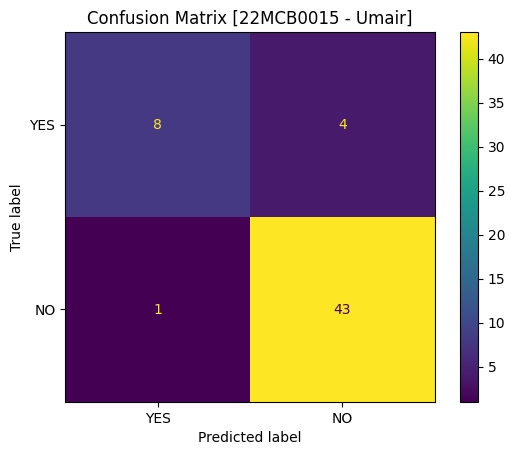

In [ ]:
from sklearn.metrics import (confusion_matrix,ConfusionMatrixDisplay)

label_names = ["YES", "NO"]
cmatrix = confusion_matrix(y_test, y_pred_all)
display = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=label_names)
display.plot()
plt.title('Confusion Matrix [22MCB0015 - Umair]')
plt.show()

## **Recall, F1 Score, Accuracy, TPR, FPR:**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

# calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_pred_all)
recall = recall_score(y_test, y_pred_all)
f1 = f1_score(y_test, y_pred_all)
accuracy = accuracy_score(y_test, y_pred_all)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# calculate confusion matrix to get TPR and FPR
cm = confusion_matrix(y_test, y_pred_all)
TPR = cm[1,1] / (cm[1,1] + cm[1,0])
FPR = cm[0,1] / (cm[0,1] + cm[0,0])

print(f"TPR: {TPR}")
print(f"FPR: {FPR}")


Precision: 0.9148936170212766
Recall: 0.9772727272727273
F1 Score: 0.945054945054945
Accuracy: 0.9107142857142857
TPR: 0.9772727272727273
FPR: 0.3333333333333333


### **Visualization of these metrics**

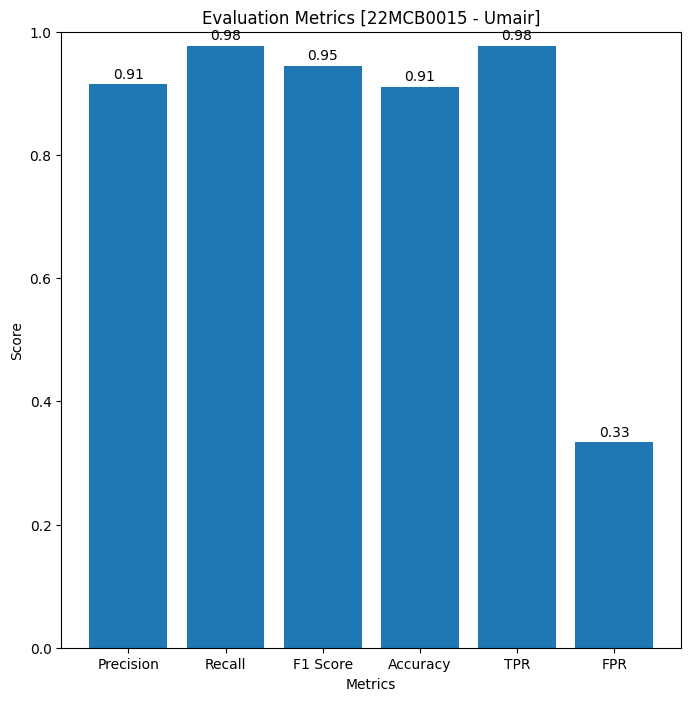

In [ ]:
metrics = [precision, recall, f1, accuracy, TPR, FPR]
metric_names = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'TPR', 'FPR']

# Plotting
plt.figure(figsize=(8, 8))
plt.bar(metric_names, metrics)
plt.ylim([0, 1])
plt.title('Evaluation Metrics [22MCB0015 - Umair]')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Adding the text labels for each bar
for i in range(len(metrics)):
    plt.text(x=i, y=metrics[i]+0.01, s=round(metrics[i], 2), ha='center')

plt.show()


**ROC Curve**

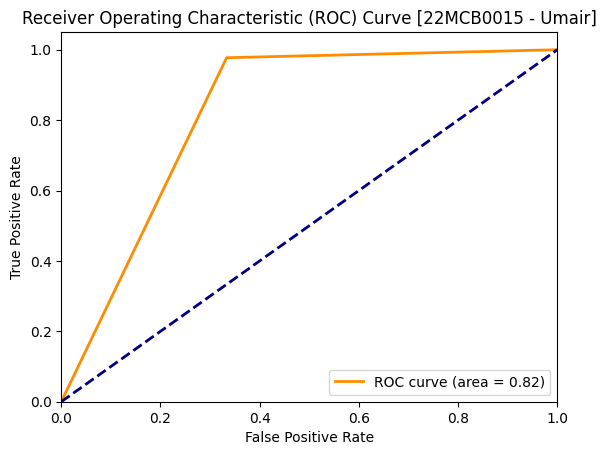

In [ ]:
# calculate the ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_all)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve [22MCB0015 - Umair]')
plt.legend(loc="lower right")
plt.show()
